<h1 style='text-align: center;'> 
Artificial Neural Networks (ANNs)
</h1>

`Narváez J.`
<p style='text-align: justify;'> 

<p style='text-align: justify;'>  
In this notebook, we will present the idea of Artificial Neural Networks (ANNs). We will create simple examples such as Perceptron to illustrate how ANNs work. </p>

# Artiﬁcial Neural Networks

<p style='text-align: justify;'>  
An artiﬁcial neural network (ANN) is an information–processing system that relies on many parameters. It takes some inputs, processes these, and finally gets one or more outputs.
</p>
    
Some important sub-definitions are the following:

- The nodes are processing elements called **neurons**.
- The connections between neurons are called **connection links**.


|<img src="./Images/NNs.png" width=600 height=600 aling="center"/>|
|:--:|
| <b> An Artiﬁcial Neural Networks</b>|

# Perceptrons

<p style='text-align: justify;'> 
The basic component of an ANN is an artificial neuron. It takes some inputs, processes them according to different parameters and finally generates an output. Here, we adjust the weights of the adaptive neuron, so that it responds correctly to a training set of data. Once its weights are adjusted, its predictions can be tested by applying various input patterns. 
</p>

|<img src="./Images/Neuron.png" width=400 height=250 aling="center"/>|
|:--:|
| <b> Mathematical model of an artiﬁcial neuron</b>|

# Mathematical Model of Artiﬁcial Neural Network

<p style='text-align: justify;'> 
A neuron $N$ accepts a set of inputs $X=\{x_j\ |\ j=1\cdots n\}$. Each connection between the jth- input and $N$ is weighted with a value of $w_j$. Also, it has a self-bias term $b$. In this way, the input value of the Neuron is,</p>

<div id="InVal"></div>

$$
\begin{equation} \label{InVal} \tag{1}
 z = w_j x_j + b
\end{equation}
$$

The Neuron applies an activation function to this value $f(z)$, which is the final output.

## Activation Function
<p style='text-align: justify;'> 
Some examples of activation functions are,
</p>

- **Linear Function**:

<div id="linear"></div>

$$
\begin{equation}\label{linear}\tag{2}
 f(x) = x
\end{equation}
$$

- **Hyperbolic Tangent**:

<div id="tanh"></div>

$$
\begin{equation}\label{tanh}\tag{3}
 f(x) = \tanh{(x)}
\end{equation}
$$

- **Logistic Function**:

<div id="Logistic"></div>

$$
\begin{equation}\label{Logistic}\tag{4}
 f(x) =  \frac{1}{1+e^{-\alpha x}}\\
\end{equation}
$$

- **ReLU**:

<div id="ReLU"></div>

$$
\begin{equation}\label{ReLU}\tag{5}
 f(x) = \left\{\begin{matrix}
 &0\hspace{0.5cm}\text{if}\hspace{0.5cm} x \le 0\\
 &x\hspace{0.5cm}\text{if}\hspace{0.5cm} x > 0
\end{matrix}\right.
\end{equation}
$$

In [1]:
using Distributions # Create uniform randomly distribution
using LaTeXStrings  # Type LaTeX syntax
using LinearAlgebra # Linear Algebra's operations
using Noise         # Add different kinds of noise
using Plots         # Display plots
using Parameters    # Type constructors with default values
using Random        # Generate random numbers

In [2]:
function Linear(x, alpha=1.)
    #=-----------------------------------------------
    Linear function.
    -------------------------------------------------
    Arguments:
        x    :   Input
        alpha:   Scaling factor. Default value is 1.
    -------------------------------------------------
    Returns the value of the function and its 
    derivative as a tuple.
    -----------------------------------------------=#
    return (alpha*x, alpha)
end;

function Tanh(x)
    #=-----------------------------------------------
    Hyperbolic tangent function.
    -------------------------------------------------
    Arguments:
        x    :   Input
    -------------------------------------------------
    Returns the value of the function and its 
    derivative as a tuple.
    -----------------------------------------------=#
    z = tanh(x)
    dz = sech(x)^2
    return (z, dz)
end;

function Logistic(x, alpha = 1.)
    #=-----------------------------------------------
    Logistic Function
    -------------------------------------------------
    Arguments:
        x    :   Input
        alpha:   the logistic growth rate. Default 
                 value is 1.
    -------------------------------------------------
    Returns the value of the function and its 
    derivative as a tuple.
    -----------------------------------------------=#
    z = 1.0 / (1.0 + exp(-alpha*x))
    dz = alpha*exp(-alpha*x)*z^2
    return (z, dz)
end;

function ReLU(x)
    #=-----------------------------------------------
    Rectified linear unit function (ReLU)
    -------------------------------------------------
    Arguments:
        x    :   Input
    -------------------------------------------------
    Returns the value of the function and its 
    derivative as a tuple.
    -----------------------------------------------=#
    z = (x > 0.)*x
    dz = 1. *(x > 0.)
    return (z, dz)
end;

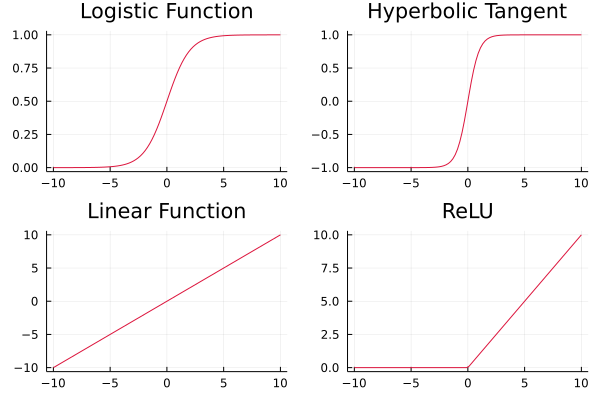

In [3]:
# Plot some examples of activation functions
x_f = range(-10,10,100)
p1 = plot(x_f, first.(Logistic.(x_f)), title="Logistic Function", color="crimson")
p2 = plot(x_f, first.(Tanh.(x_f)), title="Hyperbolic Tangent", color="crimson")
p3 = plot(x_f, first.(Linear.(x_f)), title="Linear Function", color="crimson")
p4 = plot(x_f, first.(ReLU.(x_f)), title="ReLU", color="crimson")
plot(p1, p2, p3, p4, layout = (2, 2), legend = false)

In [4]:
@with_kw mutable struct Perceptron
    #=-----------------------------------------------
    Creation of a Single Perceptron. 
    -----------------------------------------------=#
    w # Weights
    b::Float64 # Bias
    dw::Vector{Float64} = zeros(length(w)) # Change in weights
    db::Float64 = 0. # Change in weights
    lr_w::Vector{Float64} = ones(length(w))*1.0e-5 # Learning rate of weights
    lr_b::Float64 = 5.0e-4 # Learning rate of Bias
    f_act # Activation function
end;

In [5]:
function Prop(P::Perceptron, x)
    #=-----------------------------------------------
    Calculate output value of a Perceptron.
    -------------------------------------------------
    Arguments:
        P    :   Perceptron (Neuron)
        x    :   Input values.
    -----------------------------------------------=#
    z = x*P.w .+ P.b
    return (P.f_act.(z))
end;

In [6]:
# Create data
m = 1000 # Length of x array
X = 10*rand(Uniform(-1,1), m, 1) # x is initialized randomly with a uniform distribution
ww = [7.5;] # coeficients of target function
y = X*ww .- 5; # Target function

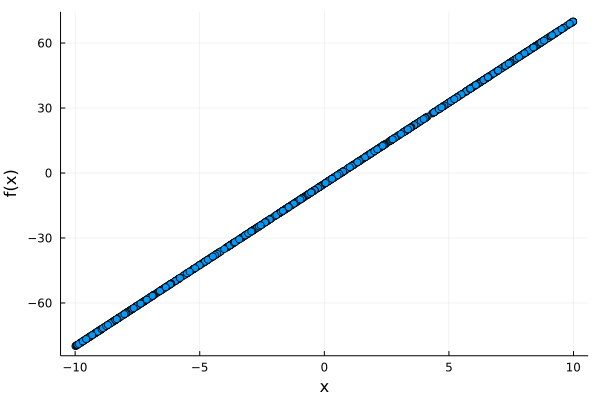

In [7]:
scatter(X, y,legend = false)
xlabel!("x")
ylabel!("f(x)")

In [8]:
n = size(X,2)
Random.seed!(2) # Fix seed
Perc = Perceptron(w = rand(0:.01:1,n), b = rand(0:.01:1), f_act=Linear)# Creation of a perceptron
                                                                # Both Wieghts and Bias are initialized randomly.

Perceptron
  w: Array{Float64}((1,)) [0.0]
  b: Float64 0.68
  dw: Array{Float64}((1,)) [0.0]
  db: Float64 0.0
  lr_w: Array{Float64}((1,)) [1.0e-5]
  lr_b: Float64 0.0005
  f_act: Linear (function of type typeof(Linear))


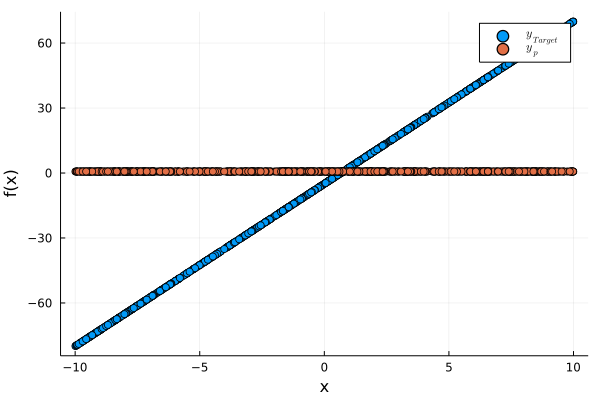

In [9]:
# First Prediction
scatter(X, [y,first.(Prop(Perc, X))],  label =[L"y_{Target}" L"y_p"])

xlabel!("x")
ylabel!("f(x)")

## Gradient Descent
<p style='text-align: justify;'> 
Now, we define a cost function $C$ that quantifies how well the Perceptron approximates its predictions $y_p$ for all training inputs $x$ to the target data $y_{Target}$. We can choose different functions to represent the error of $y_p$, i.e. Mean Squared Error (MSE) or Mean Absolute Error (MAE), etc.
</p>

<p style='text-align: justify;'> 
For instance, let's see the <b>mean squared error (MSE)</b>, defined by  
</p>

<div id="CostF"></div>

$$
\begin{equation} \label{CostF} \tag{6}
  C(w_j, b) = \frac{1}{2}\frac{1}{N}\sum_{s=1}^N\parallel y_p^s - y^s_{Target}\parallel ^2, \hspace{0.5 cm}\text{where $x$ is the index of example,}
\end{equation}
$$

the $\parallel \cdot\parallel $ notation just denotes the usual norm of a vector. 

|<img src="./Images/MSE.png" width=400 height=300 aling="center"/>|
|:--:|
| <b> Cost Function</b>|

<p style='text-align: justify;'> 
Our goal now is to minimize this function $C(w,b)$ such that the set of weights and biases makes the prediction as close to the goal as possible. To achieve this purpose, we'll use the gradient descent algorithm. Here, we consider the calculus properties of the gradient, thus, we change $w,b$ in the direction opposite to it, i.e., the direction of maximum decreasing of the cost function, that is, "we'll slide down the hill".
</p>

|<img src="./Images/GradientDescent.png" width=400 height=300 aling="center"/>|
|:--:|
| <b> Gradient Descent Method</b>|

Therefore, we have

<div id="GradDesc"></div>

$$
\begin{equation}\label{GradDesc}\tag{7}
 \dot{w} \sim -\nabla_w C(w),
\end{equation}
$$

where we include the bias parameter in $w$, that is, $b$ could be thougth as an extra weight. Then, we update weights according to,

<div id="Update_w"></div>

$$
\begin{equation}\label{Update_w}\tag{8}
 \Delta w_j = -\eta \frac{\partial C(w)}{\partial w_j},
\end{equation}
$$

where $\eta$ is called the <i>learning rate</i> and determines how much the surface will be descended in one step. Now, replacing ([6](#CostF)) in ([8](#Update_w)), we get

$$
\begin{align}
 \Delta w_j &= -\eta \frac{1}{N}\sum_{s=1}^N\parallel y_p^s - y^s_{Target}\parallel\frac{\partial y_p^s}{\partial w_j}\\
  &= -\eta \frac{1}{N}\sum_{s=1}^N\parallel y_p^s - y^s_{Target}\parallel\frac{\partial F(z_s)}{\partial z_s}\frac{\partial z_s}{\partial w_j},
\end{align}
$$

where $F$ is the activation function. Finally, we obtain:

<div id="New_wj"></div>

$$
\begin{equation}\label{New_wj}\tag{9}
 \Delta w_j = -\eta \frac{1}{N}\sum_{s=1}^N\parallel y_p^s - y^s_{Target}\parallel\frac{\partial F(z_s)}{\partial z_s} x_s,
\end{equation}
$$

and,

<div id="New_b"></div>

$$
\begin{equation}\label{New_b}\tag{10}
 \Delta b = -\eta \frac{1}{N}\sum_{s=1}^N\parallel y_p^s - y^s_{Target}\parallel\frac{\partial F(z_s)}{\partial z_s}.
\end{equation}
$$

In [10]:
function fcost(P::Perceptron, X, Y)
    #=-----------------------------------------------
    Cost Function is Mean Squared Error
    -------------------------------------------------
    Arguments:
        P    :   Perceptron (Neuron)
        X    :   Input values.
        Y    :   Target values.
    -------------------------------------------------
    Returns MSE between X and Y (scalar).
    -----------------------------------------------=#
    f_c = 0.5*sum((first.(Prop(P, X))-Y).^2)
    return f_c
end;

In [11]:
# Cost Function at the beginning.
fcost(Perc, X, y)

942034.0684636161

In [12]:
function  gradient_step(P::Perceptron, X, Y)
    #=-----------------------------------------------
    Gradient Descent method to change the values of 
    both weights and bias.
    -------------------------------------------------
    Arguments:
        P    :   Perceptron (Neuron)
        X    :   Input values.
        Y    :   Target values.
    -------------------------------------------------
    Change the parameters: dw and db in Perceptron.
    -----------------------------------------------=#
    F = Prop(P,X)
    f, df = first.(F), last.(F)
    P.dw = 2*transpose(df.*X)*(f-Y)
    P.db = 2*transpose(df)*(f-Y)
end; 

In [13]:
gradient_step(Perc, X, y);

In [14]:
print(Perc.dw)

[-491873.5304831604]

In [15]:
print(Perc.db)

13923.379442035171

In [16]:
function improve(P::Perceptron, X, Y)
    #=-----------------------------------------------
    Update weigths and Bias of Perceptron.
    -------------------------------------------------
    Arguments:
        P    :   Perceptron (Neuron)
        X    :   Input values.
        Y    :   Target values.
    -----------------------------------------------=#
    gradient_step(P, X, Y)
    P.b -= P.lr_b*P.db
    P.w -= P.lr_w.*P.dw
end;

In [17]:
improve(Perc, X, y)

1-element Vector{Float64}:
 4.918735304831604

In [18]:
Perc.b

-6.281689721017586

In [19]:
Perc.w

1-element Vector{Float64}:
 4.918735304831604

In [20]:
function training(P::Perceptron, X, Y, epochs)
    #=-----------------------------------------------
    One full training of the perceptron.
    -------------------------------------------------
    Arguments:
        P    :   Perceptron (Neuron)
        X    :   Input values.
        Y    :   Target values.
        epochs:  Number of iterations to update w, b.
    -------------------------------------------------
    Returns the value of Cost Function through the 
    epochs.
    -----------------------------------------------=#
    history = zeros(epochs) # Cost function
    history[1] = fcost(P, X, Y)
    for ii in 2:epochs
        improve(P, X, Y)
        history[ii] = fcost(P, X, Y)
    end;
return history
end;

In [21]:
epochs = 30
loss = training(Perc,X,y,epochs);

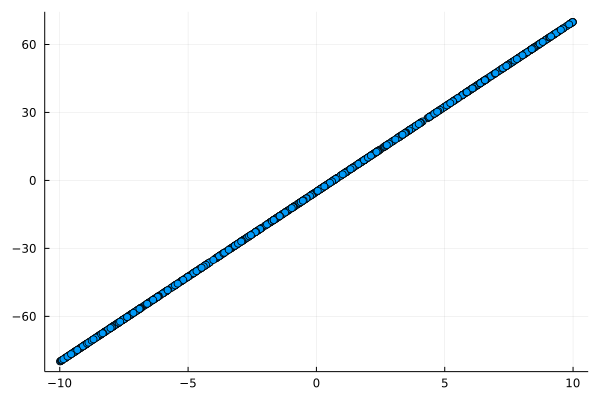

In [22]:
scatter(X,y,legend = false)

In [23]:
Yp = Prop(Perc,X);

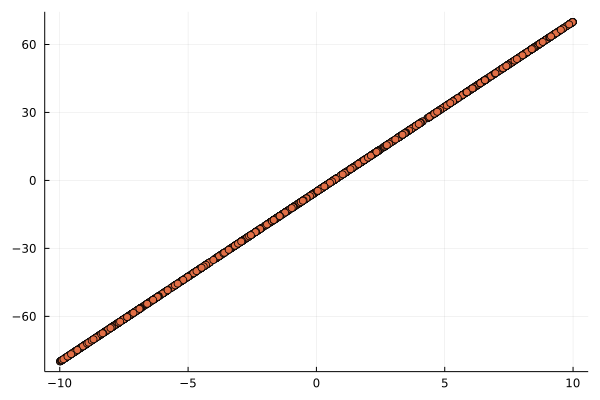

In [24]:
scatter(X, [y, first.(Yp)],legend = false)

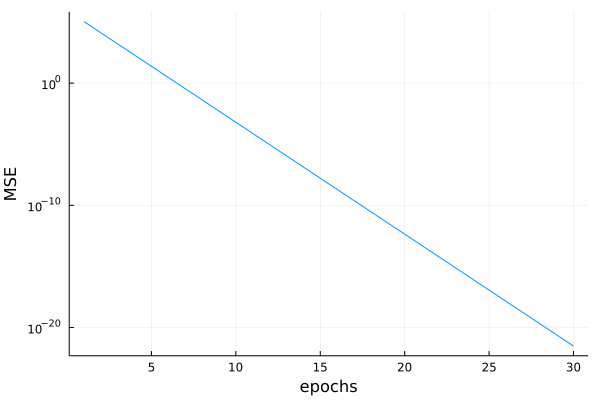

In [25]:
plot([1:epochs],loss[1:epochs],yaxis=:log,legend = false,xlabel="epochs", ylabel="MSE")

In [26]:
Y = add_gauss(y, 0.9, 1.0); # Add noise to data

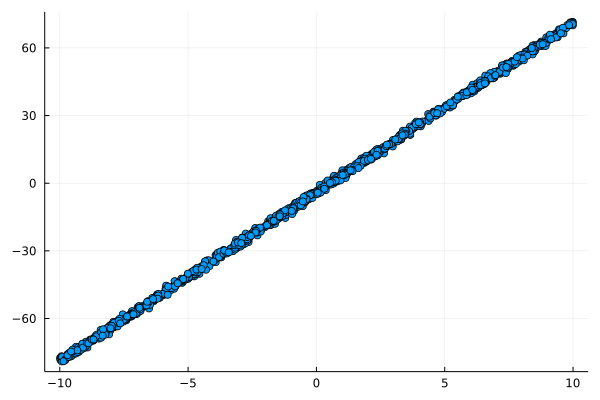

In [27]:
scatter(X,Y,legend = false)

In [28]:
Perc2 = Perceptron(w = rand(0:.01:1,n), b = rand(0:.01:1), f_act=Linear)# Creation of a perceptron
                                                                # Both Wieghts and Bias are initialized randomly.

Perceptron
  w: Array{Float64}((1,)) [0.36]
  b: Float64 0.39
  dw: Array{Float64}((1,)) [0.0]
  db: Float64 0.0
  lr_w: Array{Float64}((1,)) [1.0e-5]
  lr_b: Float64 0.0005
  f_act: Linear (function of type typeof(Linear))


In [29]:
loss2 = training(Perc2,X,Y,epochs);

In [30]:
Yp2 = Prop(Perc2,X);

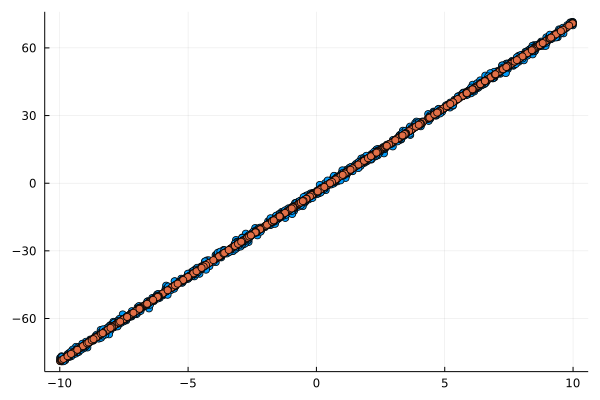

In [31]:
scatter(X, [Y, first.(Yp2)],legend = false)

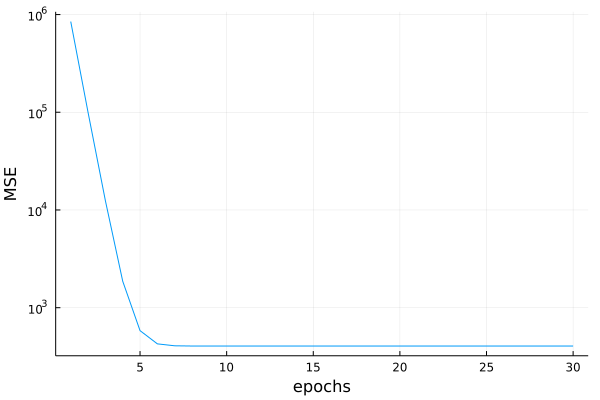

In [32]:
plot([1:epochs],loss2,yaxis=:log,legend = false,xlabel="epochs", ylabel="MSE")

<p style='text-align: justify;'> 
    <b> Note: </b> From the above results, we realize that the implemented perceptron depends heavily on the learning rate.  The latter can change their optimal values depending on the problem at work.
</p>

## References

1. `B. Widrow and M. A. Lehr. (1990). 30 years of adaptive neural networks: perceptron, Madaline, and backpropagation. In Proceedings of the IEEE, vol. 78, no. 9, pp. 1415-1442, doi: 10.1109/5.58323.`

2. `Michael A. Nielsen. (2015). Neural Networks and Deep Learning. Determination Press.`

3. `Yadav, Neha. (2015). An Introduction to Neural Network Methods for Differential Equations. 10.1007/978-94-017-9816-7.`

4. `Braspenning, P.J., Thuijsman, F., & Weijters, A.J. (1995). Artificial Neural Networks: An Introduction to ANN Theory and Practice. Artificial Neural Networks.`

5. `F. Marquardt. (2021). Lectures Series of the course: Machine Learning for Physicists.(University of Erlangen-Nuremberg & Max Planck Institute for the Science of Light)`